<a href="https://colab.research.google.com/github/Nursyazaa/Route-planning-algorithm/blob/main/DjikstraAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


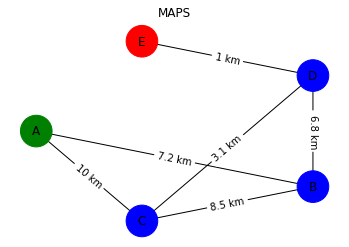

Shortest path between A and E: ['A', 'C', 'D', 'E']
time: 3.63 s (started: 2023-01-19 14:11:15 +00:00)


In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

!pip install ipython-autotime

%load_ext autotime

def shortest_path_dijkstra(graph, start, end):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    queue = [(0, start)]
    previous = {start: None}
    visited = set()

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_node in visited:
            continue
        visited.add(current_node)
        if current_node == end:
            break

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    shortest_path = []
    current_node = end
    while current_node:
        shortest_path.append(current_node)
        current_node = previous.get(current_node)

    return shortest_path[::-1]

def draw(maps):
    g = nx.DiGraph()
    color = []
    g.add_edge("A", "C", weight="10 km")
    g.add_edge("A", "B", weight="7.2 km")
    g.add_edge("B", "D", weight="6.8 km")
    g.add_edge("B", "C", weight="8.5 km")
    g.add_edge("C", "D", weight="3.1 km")
    g.add_edge("D", "E", weight="1 km")
    color = ['g','b','b','b','r']

    pos = nx.shell_layout(g)
    edge_labels = { (u,v): d['weight'] for u,v,d in g.edges(data=True) }
    nx.draw_networkx_nodes(g,pos,node_size=1000, node_color=color)
    nx.draw_networkx_edges(g,pos)
    nx.draw_networkx_labels(g,pos)
    nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels)
    plt.title("MAPS")
    plt.axis("off")
    plt.show()

def main():
    g = {
        "A": {"C": 10, "B": 7.2},
        "B": {"D": 6.8,"C": 8.5},
        "C": {"D": 3.1},
        "D": {"E": 1},
        "E": {}
    }

    start_node = "A"
    end_node = "E"
    shortest_path = shortest_path_dijkstra(g, start_node, end_node)
    draw(g)
    print("Shortest path between {} and {}: {}".format(start_node, end_node, shortest_path))

if __name__ == '__main__':
    main()
